# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [52]:
import math
import sys

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [54]:
# YOUR CODE HERE

df = pd.read_csv("wine-quality-red.tsv", sep="\t")
df = df.dropna()
df.sample(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
527,7.0,0.38,0.49,2.5,0.097,33.0,85.0,0.99620,3.39,0.77,11.4,6
883,7.2,0.60,0.04,2.5,0.076,18.0,88.0,0.99745,3.53,0.55,9.5,5
247,8.2,0.60,0.17,2.3,0.072,11.0,73.0,0.99630,3.20,0.45,9.3,5
1223,10.5,0.36,0.47,2.2,0.074,9.0,23.0,0.99638,3.23,0.76,12.0,6
1569,6.2,0.51,0.14,1.9,0.056,15.0,34.0,0.99396,3.48,0.57,11.5,6
1536,6.1,0.53,0.08,1.9,0.077,24.0,45.0,0.99528,3.60,0.68,10.3,6
117,7.8,0.56,0.12,2.0,0.082,7.0,28.0,0.99700,3.37,0.50,9.4,6
971,10.4,0.26,0.48,1.9,0.066,6.0,10.0,0.99724,3.33,0.87,10.9,6
21,7.6,0.39,0.31,2.3,0.082,23.0,71.0,0.99820,3.52,0.65,9.7,5
1318,7.5,0.63,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [55]:
# YOUR CODE HERE

print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
(1599, 12)
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000 

YOUR ANSWERS HERE
This is a red wine quality dataset. Each row represents one wine sample. Each column records a measured property of that wine.
The dataset has 1,599 rows and 12 columns: 11 input features are floats and 1 integer target column.
The target column is an integer quality score assigned by human tasters, typically between 1 and 10.
Above is the output of df.info() and df.describe(), which summarize the data types and basic statistics for each column.

Based on some quick google searches, I found some additional information on these wine properties.
fixed_acidity – concentration of fixed acids in the wine.
volatile_acidity – amount of volatile acids
citric_acid – citric acid content
residual_sugar – remaining sugar after fermentation
chlorides – salt content
free_sulfur_dioxide – free SO₂, a preservative
total_sulfur_dioxide – total SO₂
density – density of the wine
pH – acidity level
sulphates – sulphate content
alcohol – alcohol percentage
target – overall quality score of the wine

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

Shape: (1599, 12)
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Summary statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



Target value counts:
target
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


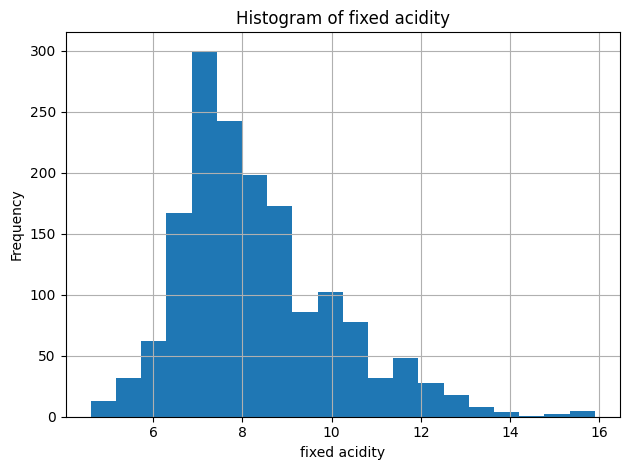

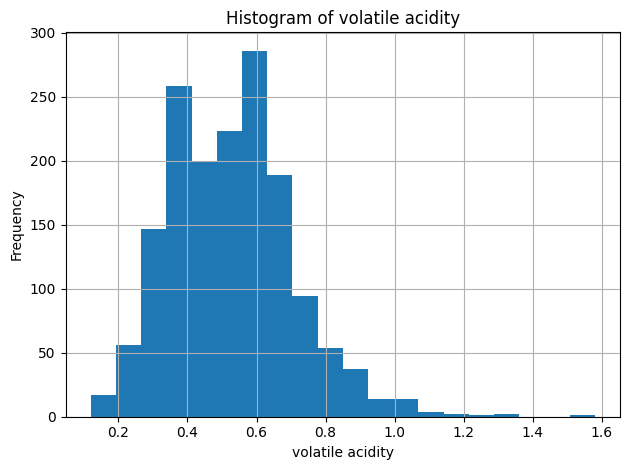

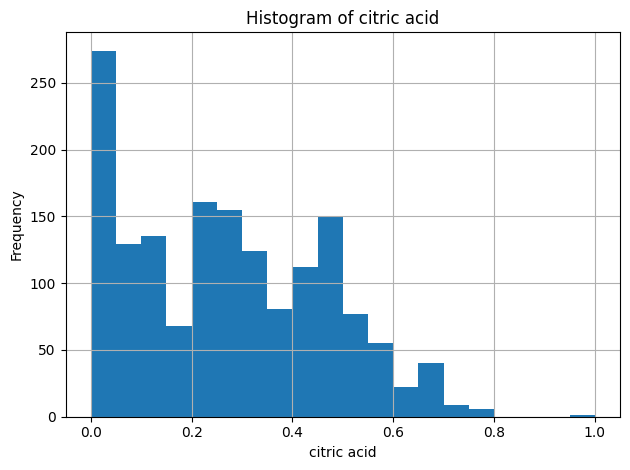

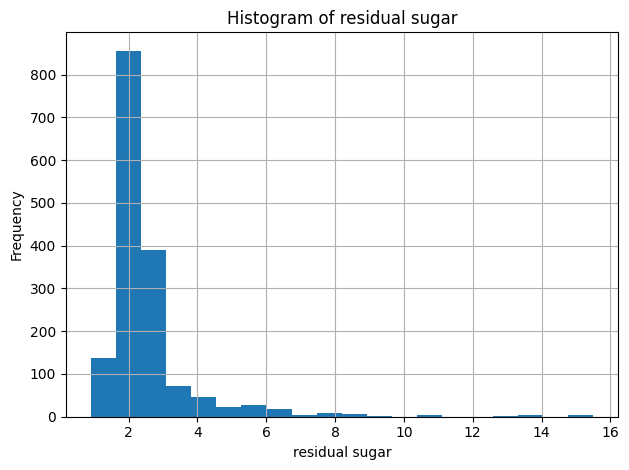

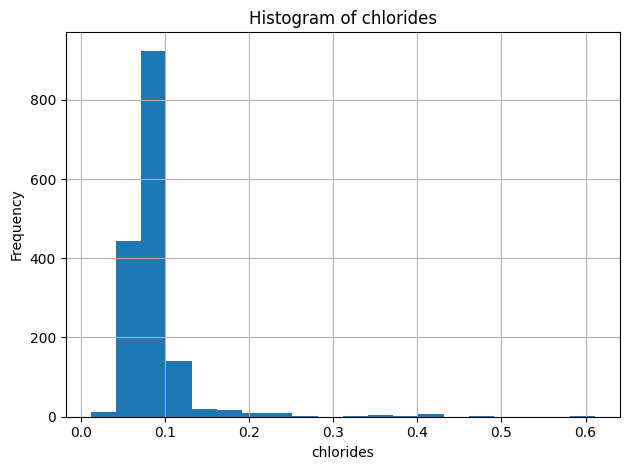

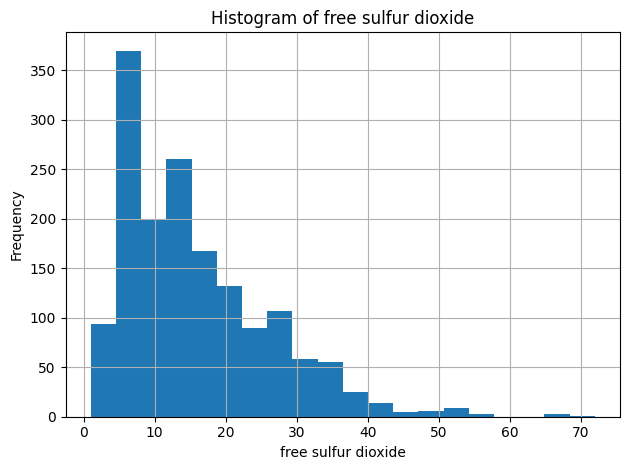

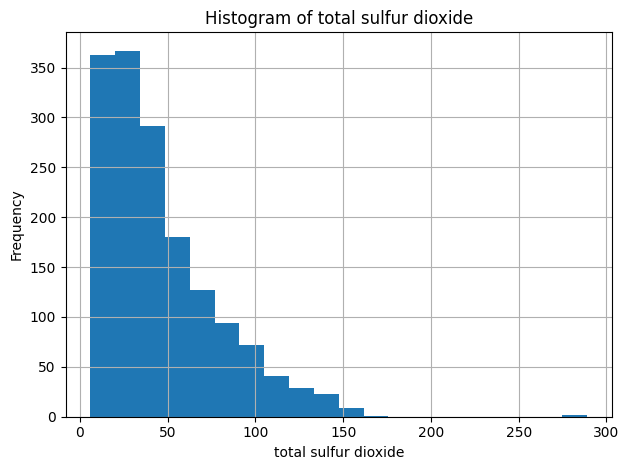

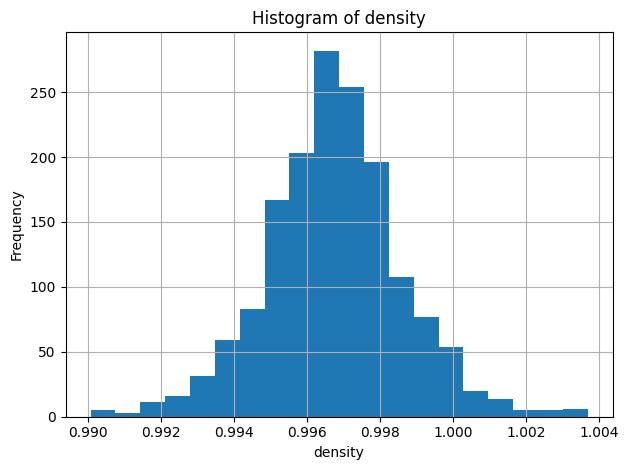

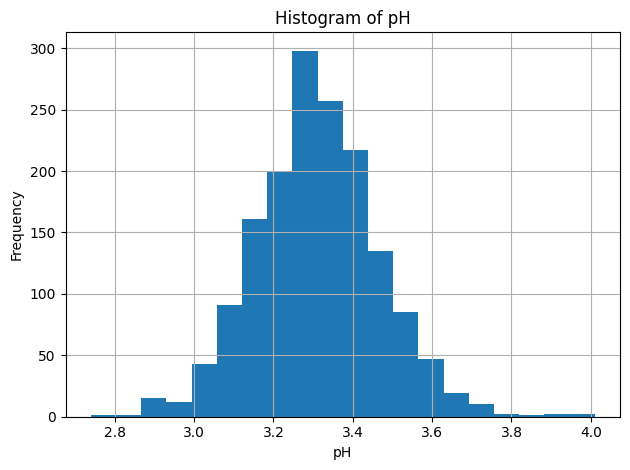

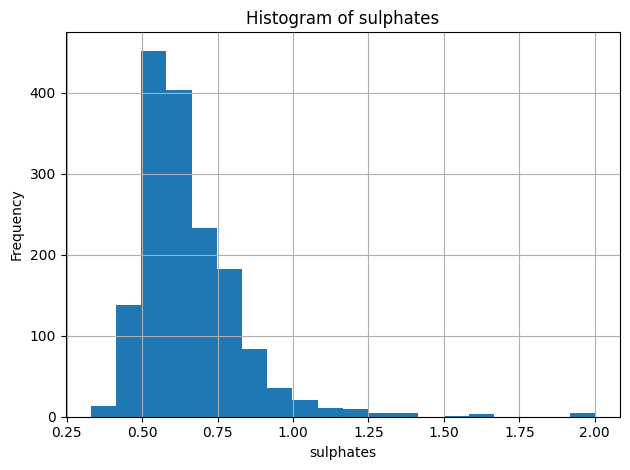

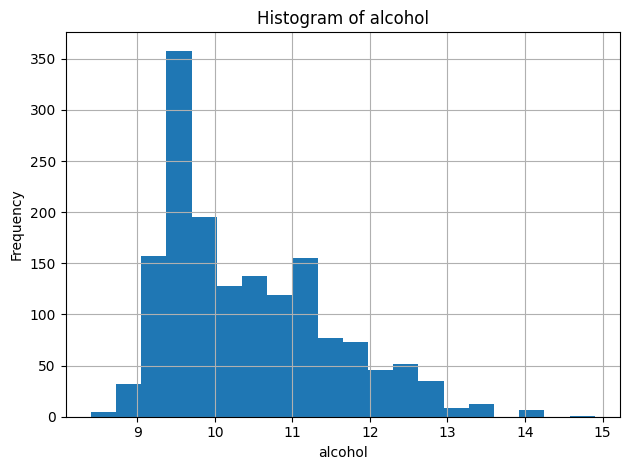

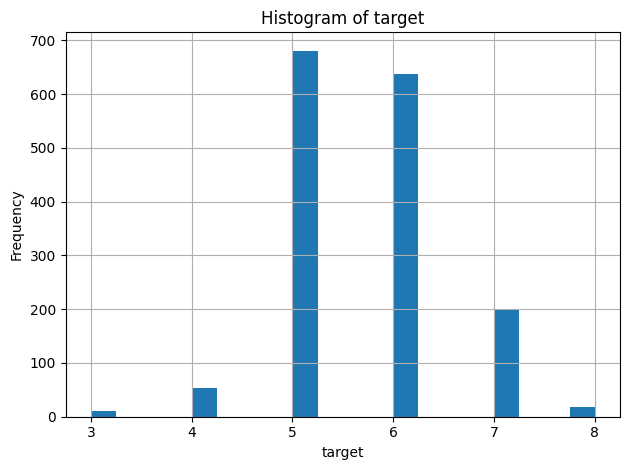

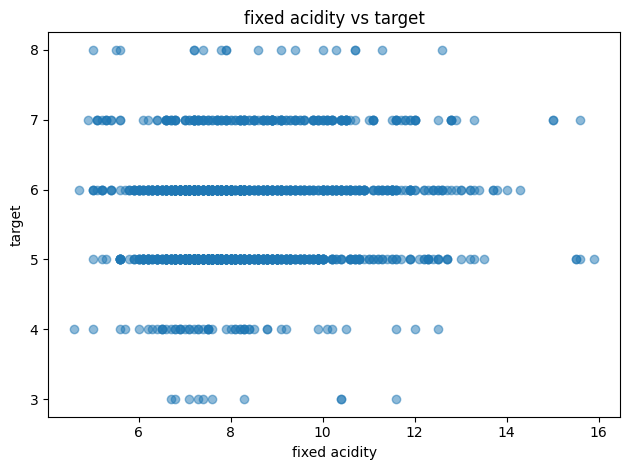

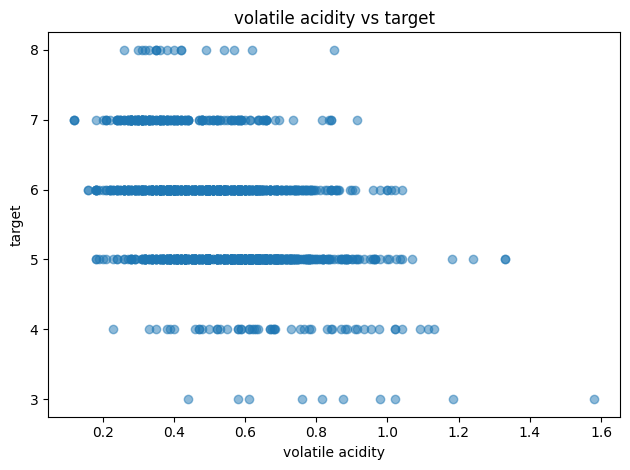

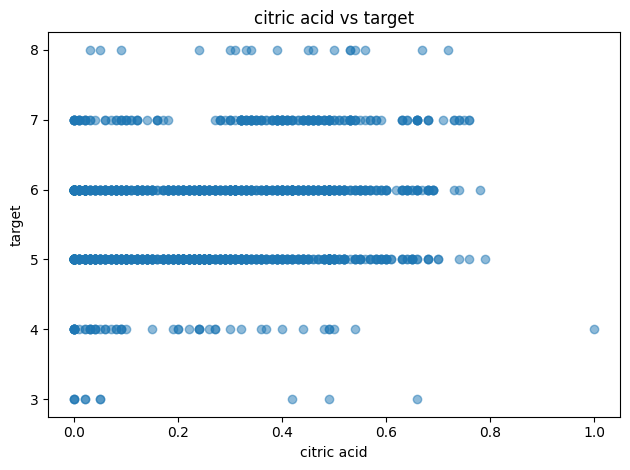

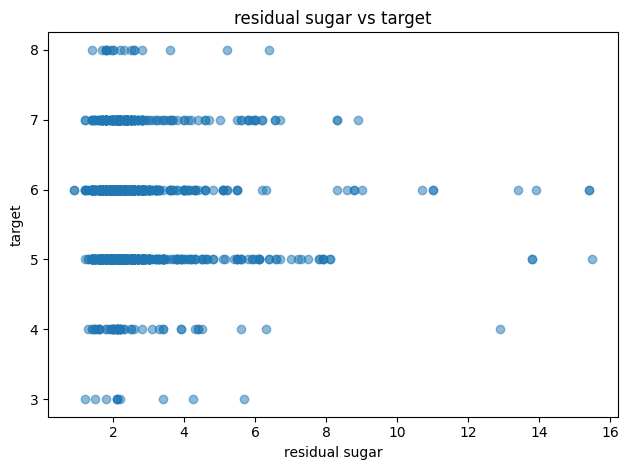

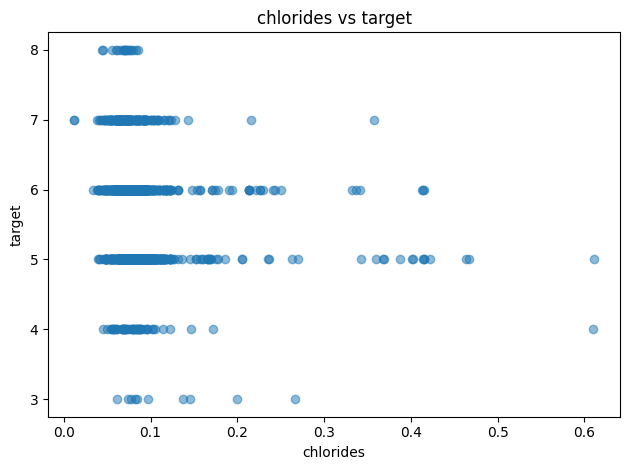

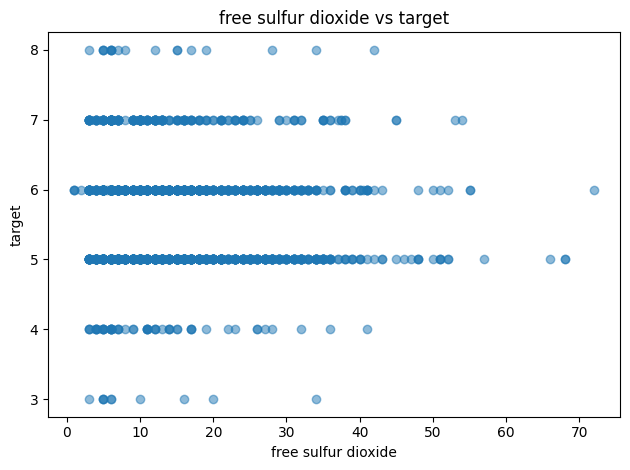

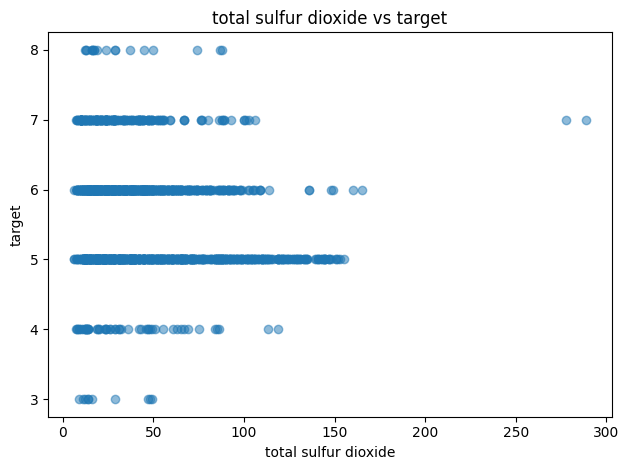

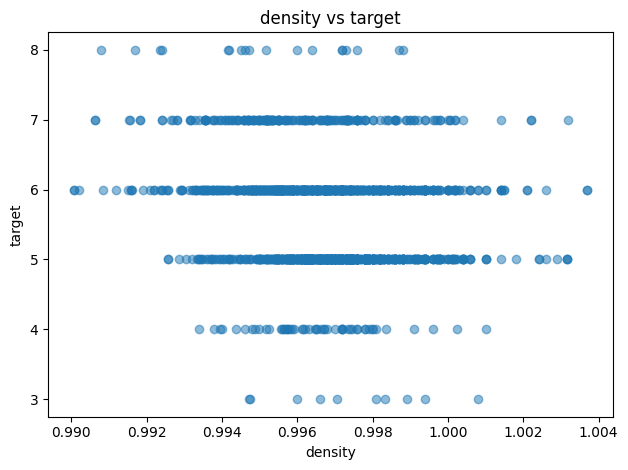

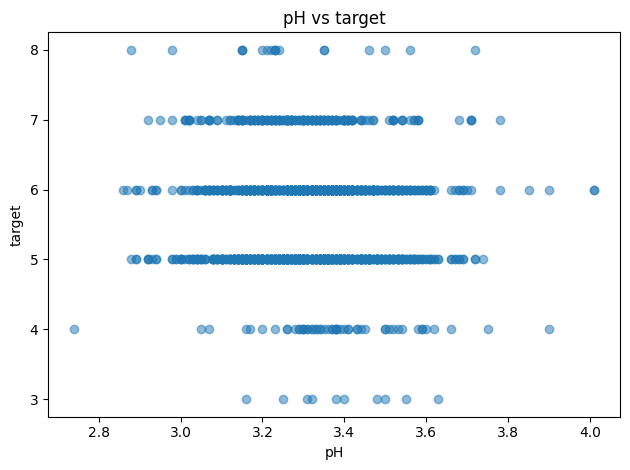

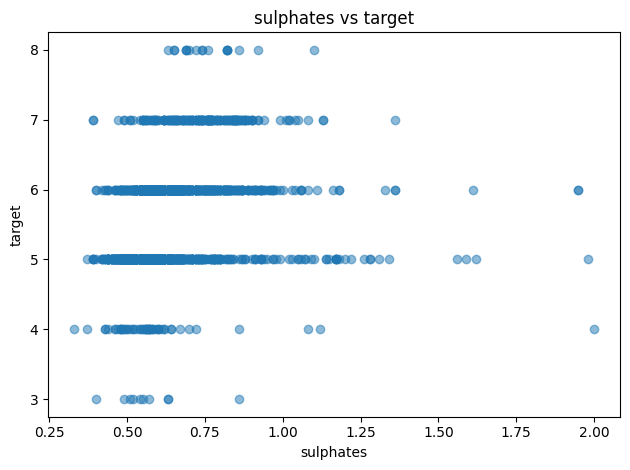

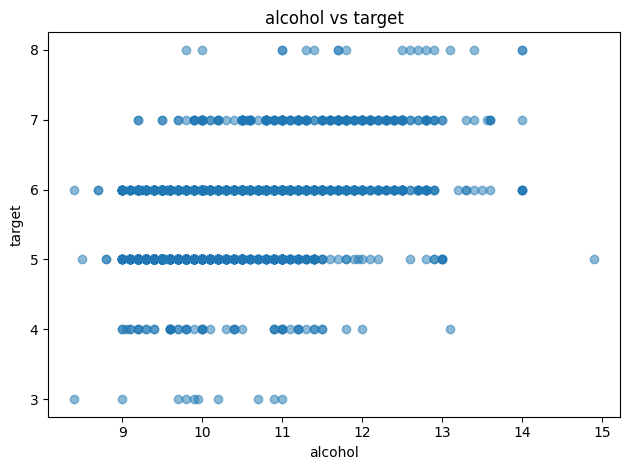

In [56]:
# YOUR CODE HERE

print("Shape:", df.shape)
print("Info:")
df.info()
print()
print("Summary statistics:")
display(df.describe())

print("\nTarget value counts:")
print(df["target"].value_counts().sort_index())

for col in df.columns:
    plt.figure()
    df[col].hist(bins=20)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


target_col = "target"

for col in df.columns:
    if col == target_col:
        continue
    plt.figure()
    plt.scatter(df[col], df[target_col], alpha=0.5)
    plt.title(f"{col} vs {target_col}")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.tight_layout()
    plt.show()

YOUR ANSWERS HERE

Overall, none of the individual variables appears to perfectly explain the quality score; the relationships are fairly noisy and there is a lot of overlap between quality levels. However, a few features show clear trends that are likely to be useful for prediction, especially alcohol, density, and chlorides.

In this scatter plot, there is a noticeable upward trend: wines with higher alcohol levels tend to receive higher quality scores. While the points are scattered at each alcohol level (so alcohol is not the only factor), the higher quality ratings (7–8) occur more often at alcohol values above about 11–12%. This suggests that alcohol content has a positive but imperfect association with perceived wine quality.


![alt text](image.png)

Here we see an overall negative relationship: better-rated wines generally have slightly lower density. Many of the higher quality scores cluster on the left side of the plot (lower density), while lower-quality wines are more common at higher densities. This is consistent with the chemistry, since density is related to alcohol and sugar content, and helps explain why density might be a useful predictor in a regression model.

![alt text](image-1.png)

Chlorides vs. target:
This plot shows that wines with lower chloride levels (less salt content) tend to have higher quality scores. Most of the higher ratings (7–8) are concentrated near lower chloride values, while higher chloride levels are more often associated with average or below-average quality. The pattern is still noisy, but the downward trend suggests that excessive chlorides may negatively impact perceived wine quality.

![alt text](image-2.png)

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

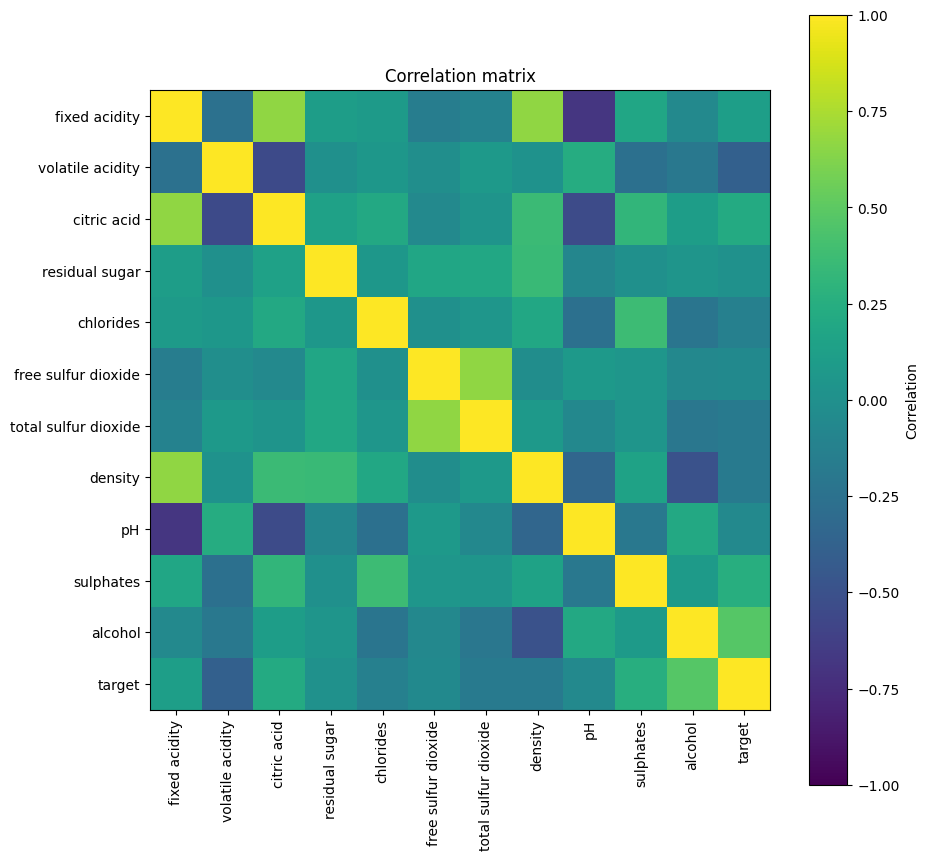

In [57]:
# YOUR CODE HERE
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 10))
plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(label="Correlation")

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation matrix")
plt.show()

YOUR ANSWERS HERE
The greatest correlations seem to be free sulfur dioxide and total sulfur dioxide.

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

In [58]:
# YOUR CODE HERE

features = df.drop(columns=["target"])
target   = df["target"]

from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X=features,y=target)

ridge = linear_model.Ridge()
ridge.fit(X=features,y=target)

lasso = linear_model.Lasso()
lasso.fit(X=features,y=target)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


YOUR ANSWERS HERE

Model 1 – LinearRegression
• scikit-learn docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

• Tutorial: https://www.geeksforgeeks.org/machine-learning/python-linear-regression-using-sklearn/

Model 2 – Ridge
• scikit-learn docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

• Tutorial: https://www.geeksforgeeks.org/machine-learning/ml-ridge-regressor-using-sklearn/

Model 3 – Lasso
• scikit-learn docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

• Tutorial: https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression-using-sklearn

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

LinearRegression: L2 = 0.4168, L1 = 0.5005
Ridge (alpha=0.1): L2 = 0.4170, L1 = 0.5009
Lasso (alpha=0.1): L2 = 0.4957, L1 = 0.5562


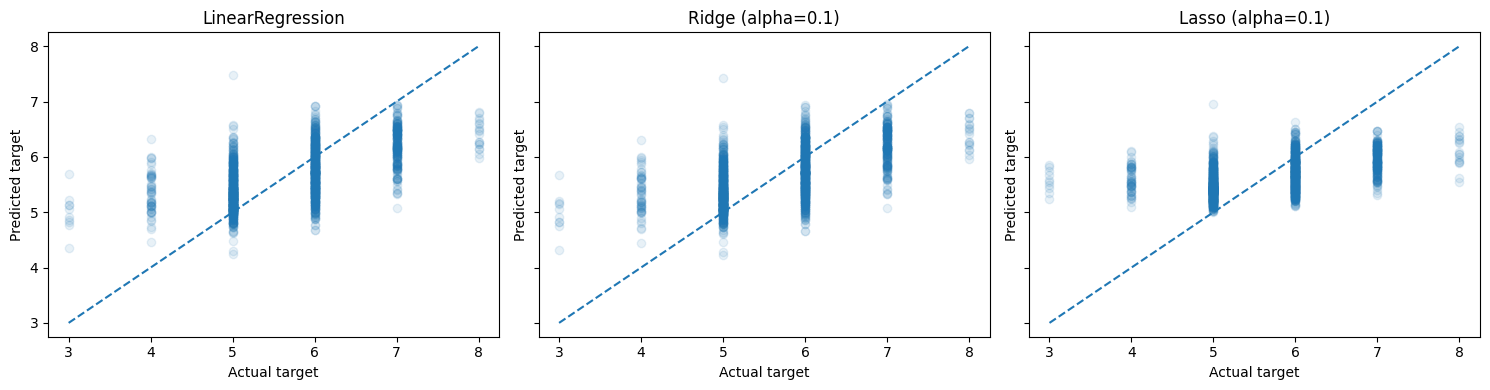

In [59]:
features = df.drop(columns=["target"])
target   = df["target"]

from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

X = features.values
y = target.values

# 3 different regression models
models = {
    "LinearRegression": linear_model.LinearRegression(),
    "Ridge (alpha=0.1)": linear_model.Ridge(alpha=0.1),
    "Lasso (alpha=0.1)": linear_model.Lasso(alpha=0.1)
}

predictions = {}
losses = {}

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    predictions[name] = y_pred

    # L2 (mean squared error) and L1 (mean absolute error)
    l2 = np.mean((y - y_pred) ** 2)
    l1 = np.mean(np.abs(y - y_pred))
    losses[name] = {"L2": l2, "L1": l1}

    print(f"{name}: L2 = {l2:.4f}, L1 = {l1:.4f}")



fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

y_min, y_max = y.min(), y.max()

for ax, (name, y_pred) in zip(axes, predictions.items()):
    ax.scatter(y, y_pred, alpha=0.1)
    ax.plot([y_min, y_max], [y_min, y_max], "--")  
    ax.set_title(name)
    ax.set_xlabel("Actual target")
    ax.set_ylabel("Predicted target")

plt.tight_layout()
plt.show()


YOUR ANSWERS HERE
LinearRegression had the lowest training losses (L2 ≈ 0.42, L1 ≈ 0.50), with Ridge performing almost identically and Lasso slightly worse, probably because the L1 regularization shrinks some coefficients too much. In all three scatter plots the points are fairly close to the diagonal but still show a lot of spread, especially for higher quality scores, which suggests a moderate fit but not perfect accuracy. This motivates trying feature selection or different preprocessing in later problems.

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [60]:
# YOUR CODE HERE

X = features.values
y = target.values

# same three model types as before
model_defs = {
    "LinearRegression": lambda: linear_model.LinearRegression(),
    "Ridge (alpha=0.1)": lambda: linear_model.Ridge(alpha=0.1),
    "Lasso (alpha=0.1)": lambda: linear_model.Lasso(alpha=0.1),
}

k = 5
n = len(X)
indices = np.arange(n)
np.random.seed(0)
np.random.shuffle(indices)

# split shuffled indices into 5 folds
folds = np.array_split(indices, k)

# reuse your fit/predict/L2 code inside a loop
cv_l2 = {name: [] for name in model_defs}

for i in range(k):
    test_idx = folds[i]
    train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]

    for name, make_model in model_defs.items():
        model = make_model()              # fresh model each time
        model.fit(X_train, y_train)       # <-- your existing fit
        y_pred = model.predict(X_test)    # <-- your existing predict
        l2 = np.mean((y_test - y_pred)**2)
        cv_l2[name].append(l2)

# average L2 over the 5 folds
for name in model_defs:
    mean_cv_l2 = np.mean(cv_l2[name])
    print(f"{name}: mean CV L2 = {mean_cv_l2:.4f}")


LinearRegression: mean CV L2 = 0.4275
Ridge (alpha=0.1): mean CV L2 = 0.4270
Lasso (alpha=0.1): mean CV L2 = 0.5005


YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [61]:
# YOUR CODE HERE

#getting features and targets
X = features.values
y = target.values

#finding means and stds to standardize values
means = X.mean(axis=0)
stds = X.std(axis=0)

#standardizing
X_scaled = (X - means) / stds

#models from #6
models_scaled = {
    "LinearRegression (scaled)": linear_model.LinearRegression(),
    "Ridge (alpha=0.1, scaled)": linear_model.Ridge(alpha=0.1),
    "Lasso (alpha=0.1, scaled)": linear_model.Lasso(alpha=0.1),
}


l2_scaled = {}

for name, model in models_scaled.items():
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    l2 = np.mean((y - y_pred) ** 2)
    l2_scaled[name] = l2
    print(f"{name}: L2 (scaled) = {l2:.4f}")


l2_scaled


LinearRegression (scaled): L2 (scaled) = 0.4168
Ridge (alpha=0.1, scaled): L2 (scaled) = 0.4168
Lasso (alpha=0.1, scaled): L2 (scaled) = 0.4548


{'LinearRegression (scaled)': np.float64(0.41676716722140805),
 'Ridge (alpha=0.1, scaled)': np.float64(0.4167671683557297),
 'Lasso (alpha=0.1, scaled)': np.float64(0.45481559678137384)}

YOUR ANSWERS HERE
After standardizing all features columns to have a mean 0 and standard deviation of 1, the Linear Regression and Ridge L2 values changed very little. This seems to indicate that least squares and lightly regularized Ridge are not impacted by standardizing the features.

Problem 6 L2 and L1 values copied:
LinearRegression: L2 = 0.4168
Ridge (alpha=0.1): L2 = 0.4170
Lasso (alpha=0.1): L2 = 0.4957





### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

In [62]:
# YOUR CODE HERE

YOUR ANSWERS HERE
Thats probably a waste of resources. It may improve validation scores, but it wont necessarily do better on new data.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [63]:
# YOUR CODE HERE

YOUR ANSWERS HERE
Based on the L2 values, the best models are Linear Regressoin and scaled Ridge. Both achieve and L2 of about .4168 on the dataset.Lasso performed noticeable worse after scaling. Ridge includees a small amount of regularization, so I would choose Ridge as the best model. It performs essentially the same, but would be a less prone to overfitting.